#                       ZOMATO Project II :     Part-2

##              Question 2.1.1

###               Write a short detail analysis of how the rating is affected by restaurant due                      following features: Plot a suitable graph to explain your inference.

###               Number of Votes given Restaurant

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


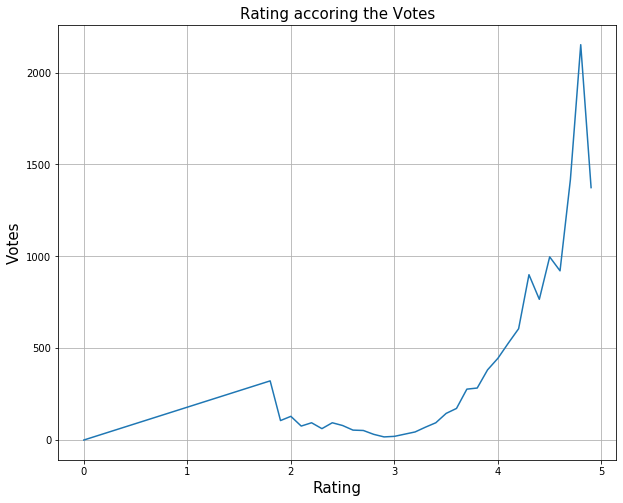

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]
zomato['Rating with Votes'] = zomato['Aggregate rating'].astype('str') + "##" + zomato['Votes'].astype('str')
votes_rating={}
def getting(variable):
    rating=round(float(variable.split("##")[0]),2)
    vote=int(float(variable.split("##")[1]))
    if rating not in votes_rating:
        votes_rating[rating] = [vote,1]
    else:
        votes_rating[rating][0]+=vote
        votes_rating[rating][1]+=1

zomato['Rating with Votes'].apply(getting)
total_votes_rating = [[key,value[0]//value[1]] for key,value in votes_rating.items()]
total_votes_rating.sort()

y = [i[1] for i in total_votes_rating]
x = [i[0] for i in total_votes_rating]
fig = plt.figure(figsize = (10,8))
plt.plot(x,y)
plt.grid()
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Votes",fontsize=15)
plt.title("Rating accoring the Votes",fontsize=15)
plt.show()

##              Question 2.1.2

###               Write a short detail analysis of how the rating is affected by restaurant due                      following features: Plot a suitable graph to explain your inference.

###               Restaurant serving more number of cuisines.

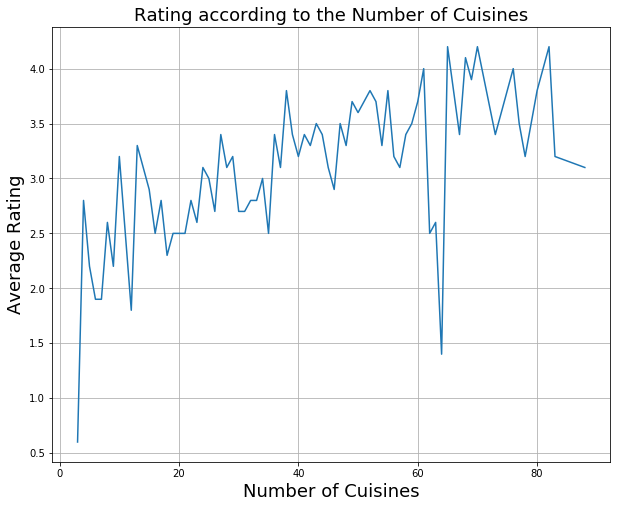

In [3]:

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]

rating=np.array(zomato['Aggregate rating'])
cuisines=np.array(zomato['Cuisines'])

hash={}
for i in range(len(rating)):
    no_cus=len(cuisines[i])
    if no_cus not in hash:
        hash[no_cus]=[[rating[i]],1]
    else:
        hash[no_cus][0].append(rating[i])
        hash[no_cus][1]+=1

ans=[]
for key,value in hash.items():
    avg_rating = round(sum(value[0])/value[1],1)
    ans.append([key,avg_rating])
    
#print(ans)
ans.sort(reverse=True)

y = [i[1] for i in ans]
x = [i[0] for i in ans]

fig = plt.figure(figsize = (10, 8))
plt.xlabel("Number of Cuisines",fontsize=18)
plt.ylabel("Average Rating",fontsize=18)
plt.title("Rating according to the Number of Cuisines",fontsize=18)
plt.plot(x,y)
plt.grid()

plt.show()


##              Question 2.1.3

###               Write a short detail analysis of how the rating is affected by restaurant due                      following features: Plot a suitable graph to explain your inference.

###               Average Cost of Restaurant

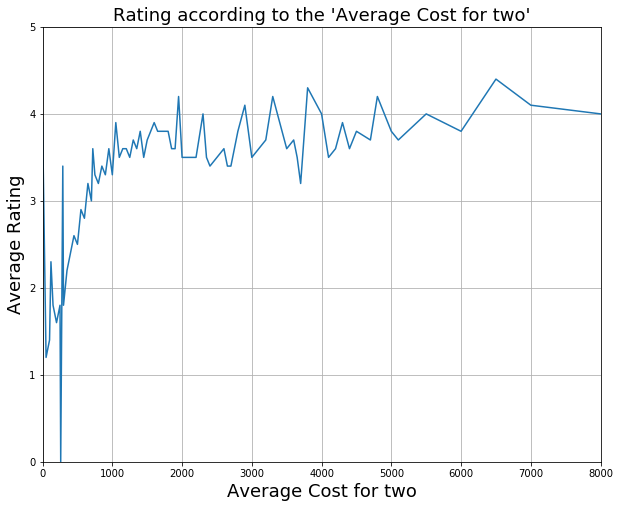

In [4]:

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]

rating=np.array(zomato['Aggregate rating'])
cost=np.array(zomato['Average Cost for two'])

hash={}
for i in range(len(rating)):
    if cost[i] not in hash:
        hash[cost[i]]=[[rating[i]],1]
    else:
        hash[cost[i]][0].append(rating[i])
        hash[cost[i]][1]+=1

ans=[]
for key,value in hash.items():
    avg_rating = round(sum(value[0])/value[1],1)
    ans.append([key,avg_rating])
    
#print(ans)
ans.sort(reverse=True)

y = [i[1] for i in ans]
x = [i[0] for i in ans]

fig = plt.figure(figsize = (10, 8))
plt.xlabel("Average Cost for two",fontsize=18)
plt.ylabel("Average Rating",fontsize=18)
plt.title("Rating according to the 'Average Cost for two'",fontsize=18)
plt.plot(x,y)
plt.axis([0,8000,0,5])
plt.grid()

plt.show()



##              Question 2.1.4

###               Write a short detail analysis of how the rating is affected by restaurant due                      following features: Plot a suitable graph to explain your inference.

###               Restaurant serving some specific cuisines

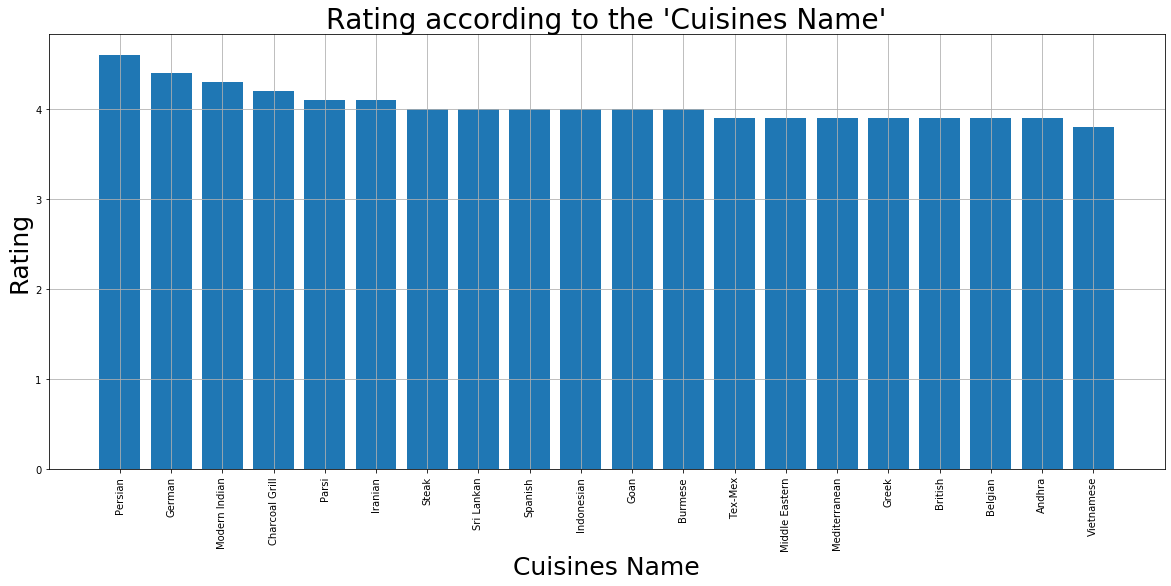

In [5]:

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]

rating=np.array(zomato['Aggregate rating'])
cus=np.array(zomato['Cuisines'])

hash={}
for i in range(len(rating)):
    cus_list=cus[i].split(", ")
    for ele in cus_list:
        if ele not in hash:
            hash[ele]=[[rating[i]],1]
        else:
            hash[ele][0].append(rating[i])
            hash[ele][1]+=1

ans=[]
for key,value in hash.items():
    avg_rating = round(sum(value[0])/value[1],1)
    ans.append([avg_rating,key])
    

ans.sort(reverse=True)

cuisines = []
ratings = []
for i in ans:
    cuisines.append(i[1])
    ratings.append(i[0])
fig = plt.figure(figsize = (20, 8))
plt.bar(cuisines[0:20],ratings[0:20])
plt.xticks(rotation=90)
plt.title("Rating according to the 'Cuisines Name'",fontsize=28)
plt.xlabel("Cuisines Name",fontsize=25)
plt.ylabel("Rating", fontsize=25)
plt.grid()
plt.show()





##            Question 2.2.1

###             Find the weighted restaurant rating of each locality and find out                                          the top 10 localities with more weighted restaurant rating?

###             Weighted Restaurant Rating=Σ (number of votes * rating) / Σ                                                (number of votes).

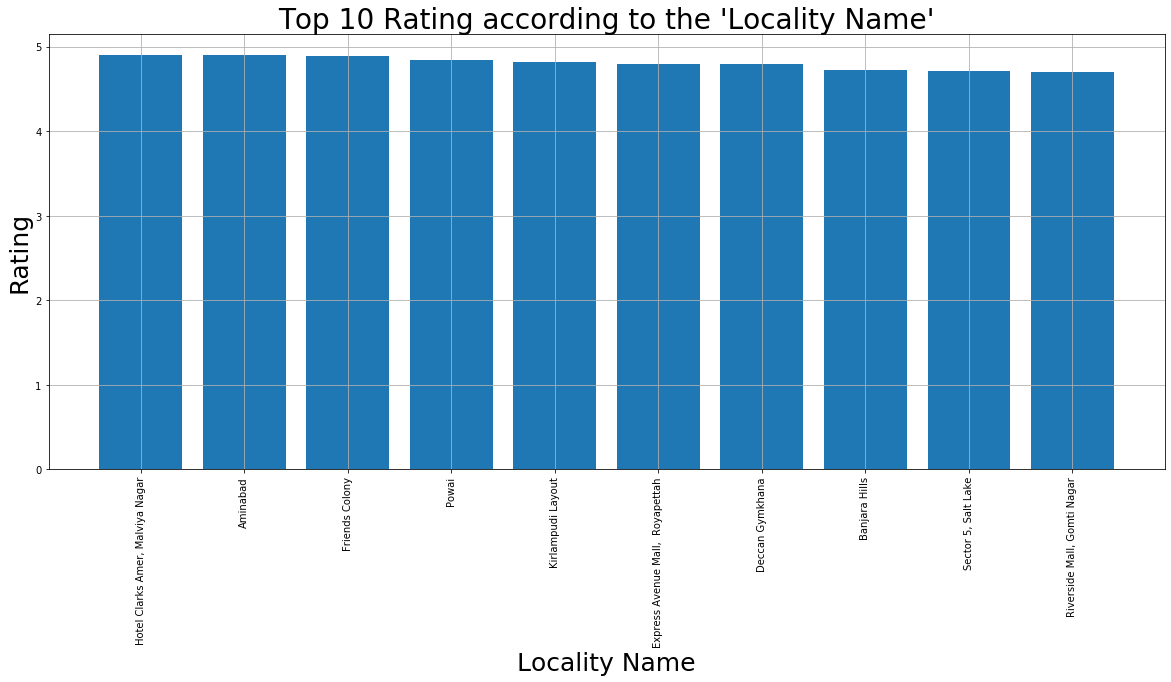

In [6]:

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('zomato.csv',encoding='latin-1')
zomato= df[df['Country Code']==1]
rating=np.array(zomato['Aggregate rating'])
local=np.array(zomato['Locality'])
votes = np.array(zomato['Votes'])

hash={}

for i in range(len(rating)):
    if votes[i]!=0:
        area=local[i]
        if  area not in hash:
            hash[area]=[rating[i]*votes[i],votes[i]]
        else:
            hash[area][0]+=rating[i]*votes[i]
            hash[area][1]+=votes[i]

ans=[]
for key,value in hash.items():
    avg_rating = round(value[0]/value[1],2)
    ans.append([avg_rating,key])
    

ans.sort(reverse=True)


locality_X = []
ratings_Y = []


for i in ans:
    locality_X.append(i[1])
    ratings_Y.append(i[0])
    
    
fig = plt.figure(figsize = (20, 8))
plt.bar(locality_X[0:10],ratings_Y[0:10])
plt.xticks(rotation=90)
plt.title("Top 10 Rating according to the 'Locality Name'",fontsize=28)
plt.xlabel("Locality Name",fontsize=25)
plt.ylabel("Rating", fontsize=25)
plt.grid()
plt.show()


